Loading O images: 12565it [03:29, 59.88it/s]
Loading R images: 9999it [03:51, 43.28it/s] 


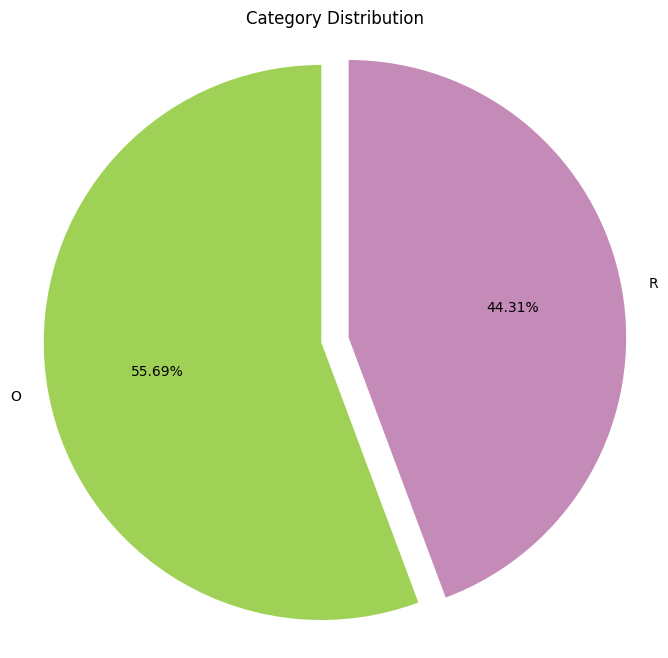

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

# Ignore warnings
warnings.filterwarnings('ignore')

# Define path to your training data
train_p = "DATASET\TRAIN"  # Replace with your actual path

# Initialize lists for images and labels
x_data = []
y_data = []

# Path handling with pathlib
train_dir = Path(train_p)

# Image normalization using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images
for category_dir in train_dir.iterdir():
    if category_dir.is_dir():
        category_label = category_dir.name
        for file in tqdm(category_dir.iterdir(), desc=f"Loading {category_label} images"):
            img_array = cv2.imread(str(file))  # Load image
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert to RGB
            x_data.append(img_array)
            y_data.append(category_label)

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Plot distribution of categories with a slight tweak to the pie chart
labels_count = data.label.value_counts()

# Pie chart
colors = ["#a0d157", "#c48bb8"]
plt.figure(figsize=(8, 8))
plt.pie(labels_count, labels=labels_count.index, autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05,0.05])
plt.title('Category Distribution')
plt.axis('equal')  # Ensure pie is a circle
plt.show()